# High Plains Aquifer Potentiometric Surface

This week, we are going to create a potentiometric surface for a heavily stressed portion of the High Plains Aquifer system in southwestern Kansas. 

### Import packages

This week, we are going to use two libraries that you have already seen (pandas and matplotlib). We are going to introduce four new packages: numpy, pylab, CartoPy, and pykrige. 

CartoPy allows us to do mapping in Python, and pykrige allows us to interpolate. In Conda Prompt, run "conda install cartopy" and "pip install pykrige" to install these packages, which were not downloaded with Anaconda. You only need to install once. 

### Import packages

You have already seen pandas and matplotlib. We also need to import cartopy and pykrige (the above lines of code only installed them for use in Python but they still need imported to run in this notebook). Finally, we are going to import pylab (which is used for plotting spatial images) and numpy (which is used to work with spatial data).

### Import data from the High Plains aquifer

This data is from 2013 (pre-irrigation season) for the High Plains Aquifer. We are going to work with data from the southern portion of Kansas and northern Texas, where water level changes are most extreme. We also calculate head and remove erroneous values where the land surface shows as 0 ft. 

![HighPlains](https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/full_width/public/thumbnails/image/hp_wlcpd15go.png)

,site_name,lat_dd,long_dd,land_surface,DTW,heads_ft
6734,USGS 411231096193202,41.208611,-96.325556,1107.0,6.77,1100.23
6733,USGS 411231096193201,41.208611,-96.325556,1107.0,6.66,1100.34
6735,USGS 411231096193203,41.208611,-96.325556,1107.0,6.53,1100.47
6834,USGS 411733096185501,41.292589,-96.315297,1126.0,4.04,1121.96
6978,USGS 412510096244801,41.419443,-96.413635,1165.0,9.75,1155.25
...,...,...,...,...,...,...
4489,USGS 392148103350401,39.363320,-103.584948,5608.0,72.70,5535.30
6945,USGS 412304104311001,41.384694,-104.519806,5778.0,232.28,5545.72
7058,USGS 412938104460601,41.493750,-104.768722,5827.0,105.35,5721.65
6538,USGS 410508105003801,41.085389,-105.010500,6585.0,94.87,6490.13


We don't want to work with all of the data, so let's trim to the southern portion of Kansas and northern portion of Texas where head declines are at their greatest. 

,site_name,lat_dd,long_dd,land_surface,DTW,heads_ft
3219,USGS 365524100063401,36.923363,-100.109860,2200.0,42.41,2157.59
3231,USGS 365832100162701,36.975584,-100.274588,2200.0,20.40,2179.60
2642,TX001355153100131901,35.863654,-100.223460,2277.0,17.70,2259.30
2654,TX001355245100171602,35.879209,-100.288185,2398.0,99.00,2299.00
2597,TX001354807100060902,35.801989,-100.102899,2375.0,76.00,2299.00
...,...,...,...,...,...,...
2200,TX001351322101384401,35.220885,-101.643790,3555.0,208.20,3346.80
2097,TX001350608101395107,35.102275,-101.664625,3540.0,184.45,3355.55
2101,TX001350612101410901,35.103387,-101.686292,3552.0,193.10,3358.90
2183,TX001351220101392201,35.205608,-101.656568,3560.0,192.60,3367.40


### Conduct kriging

After importing the pykrige package, conduct a Universal Kriging. The Universal Kriging function requires the following input parameters:

<ul>
    <li>The longitude of points to be interpolated, as a numpy data array</li>
    <li>The latitude of points to be interpolated, as a numpy data array</li>
    <li>Head for each point</li>
    <li>Variogram model, assigned as "Spherical". We could also explore Gaussian, Linear, Exponential, etc.</li>
    <li>"nlags" indicate how many points are binned when conducting the interpolation.</li>
</ul>

### Create a grid to plot the data

First, we need to define the range over which we are going to create out plot (xpoints and ypoints are the "input" in the above image). Second, we need to create the x and y coordinates for the grid (with a grid spacing of 0.01). We do this by defining the x and y points for each grid cell, defined as X and Y. Coarse grid spacing will result in faster run times. Finally, we use the method UK.execute(), with arguments that first inform that we are creating a grid ('grid'), xpoints, and ypoints. The output of this method is the interpolated values and the variance. Note that we also run the method z.filled(), which will fill in any missing values. We assign the fill_value as 'None'. This code returns the output shown above.

[[3339.3500926335937 3337.7051580797743 3335.804682516739 ...
  2483.3019190147656 2481.921205677265 2480.6288017044617]
 [3342.994310666767 3341.4331427168963 3339.608375911489 ...
  2481.702918865642 2480.2736573177194 2478.9332514258076]
 [3346.577350174598 3345.1233701899873 3343.389150697809 ...
  2480.16110706465 2478.689763950696 2477.303311629875]
 ...
 [3193.4473635062914 3192.6673006817336 3191.811819070983 ...
  2605.834486830576 2604.6550871845766 2603.5644103297373]
 [3192.522853887136 3191.707385036123 3190.817507596142 ...
  2609.561722056216 2608.2972452874637 2607.1322068889604]
 [3191.4407025195355 3190.6006263441905 3189.68132473637 ...
  2613.099527041872 2611.7676666738257 2610.5341380699438]]


### Create a potentiometric surface

Let's create a map using CartoPy with the defined extents and imported data, as well as the interpolated grid from above. We will need to use the following arguments:

<ul>
    <li>mesh grid X</li>
    <li>mesh grid Y</li>
    <li>Interpolated grid z</li>
    <li>Range over which to contour (2000-3000 ft works well, with an interval of 100 ft)</li>
</ul>

Next, we will label the contours using pylab.clabel, with the following arguments:

<ul>
    <li>The object defining the contours </li>
    <li>inline, which defines how labels are positioned</li>
    <li>font size</li>
    <li>label format (here we format as an integer using fmt = '%1.0f')</li>
</ul>

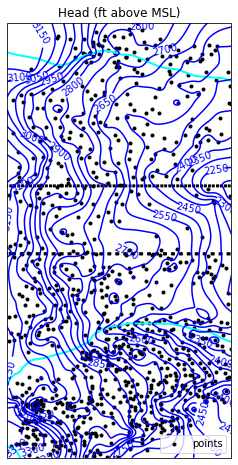

Let's define two functions, the first to create the interpolated grid and the second to plot it. With minor variations, this is the same code that we worked with above. 

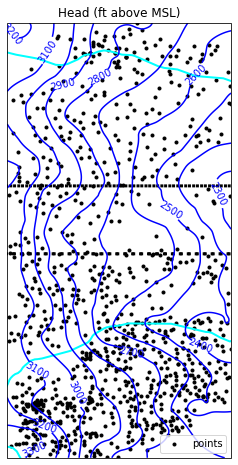

Now let's import data from 1995 and 2013. This will take some time to run. 

Finally, let's plot the data. The last plot will show the head difference from 1995 to 2013. 

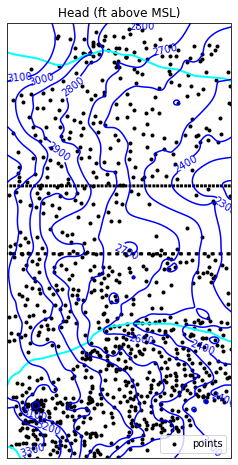